In [7]:
from stats_model import simulate_match
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Simulate match
result = simulate_match(
    "poisson",
    home_team="Newcastle United FC",
    away_team="Tottenham Hotspur FC",
    n_simulations=5000
)

scores = result["score_distribution"]

# Setup
labels = ["Home Win", "Draw", "Away Win"]
sizes = [
    result["probabilities"]["home_win"],
    result["probabilities"]["draw"],
    result["probabilities"]["away_win"],
]

home_goals = []
away_goals = []
counts = []

for score, count in scores.items():
    h, a = map(int, score.split("-"))
    home_goals.append(h)
    away_goals.append(a)
    counts.append(count)

home_goals = np.array(home_goals)
away_goals = np.array(away_goals)
counts = np.array(counts)

max_home = home_goals.max()
max_away = away_goals.max()

home_dist = np.zeros(max_home + 1)
away_dist = np.zeros(max_away + 1)

for h, a, c in zip(home_goals, away_goals, counts):
    home_dist[h] += c
    away_dist[a] += c

home_dist /= 5000
away_dist /= 5000

# HeatMap variables

max_goals_home = max([int(score.split("-")[0]) for score in scores.keys()])
max_goals_away = max([int(score.split("-")[1]) for score in scores.keys()])

heatmap_array = np.zeros((max_goals_home + 1, max_goals_away + 1))

for score, count in scores.items():
    h, a = map(int, score.split("-"))
    heatmap_array[h, a] = count

heatmap_array /= 5000


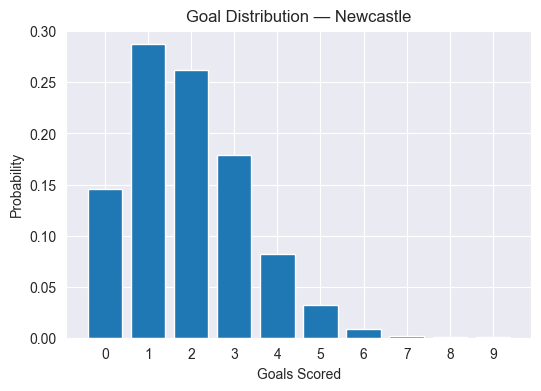

In [8]:

# Home Team Goal Distribution Bar Chart
plt.figure(figsize=(6,4))
plt.bar(range(len(home_dist)), home_dist)
plt.title(f"Goal Distribution — Newcastle")
plt.xlabel("Goals Scored")
plt.ylabel("Probability")
plt.xticks(range(len(home_dist)))
plt.show()


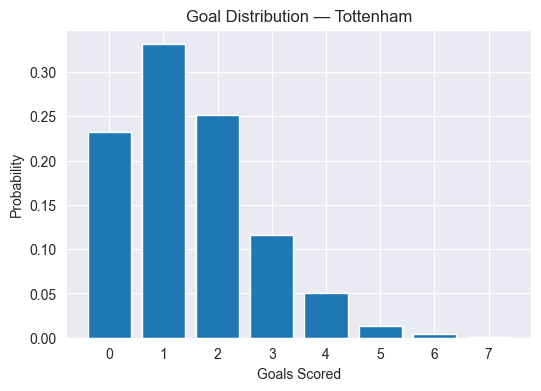

In [9]:

# Away Team Goal Distribution Bar Chart
plt.figure(figsize=(6,4))
plt.bar(range(len(away_dist)), away_dist)
plt.title(f"Goal Distribution — Tottenham")
plt.xlabel("Goals Scored")
plt.ylabel("Probability")
plt.xticks(range(len(away_dist)))
plt.show()


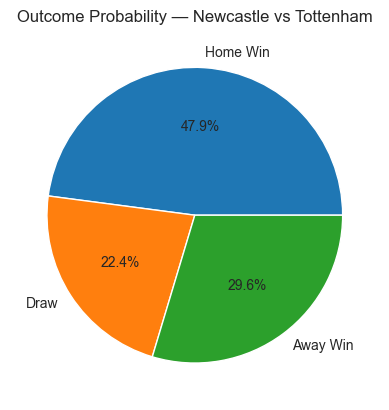

In [10]:

# Outcome Probability Pie Chart
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Outcome Probability — Newcastle vs Tottenham")
plt.show()


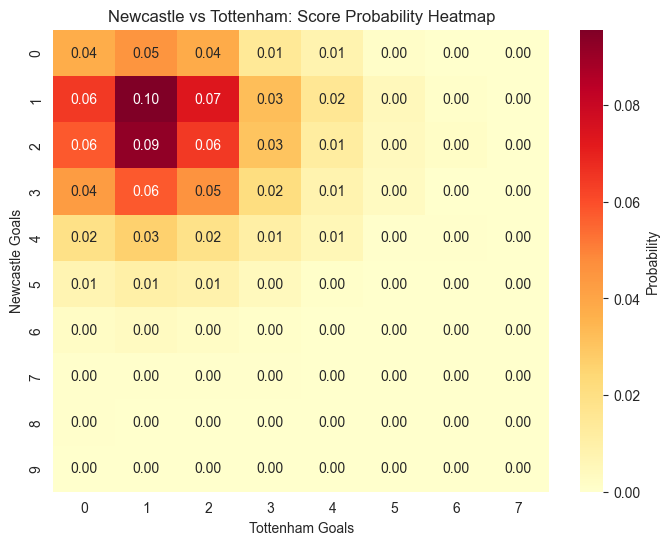

In [11]:
# Probability Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_array,
    annot=True,
    fmt=".2f",
    cmap="YlOrRd",
    cbar_kws={'label': 'Probability'},
    xticklabels=range(max_goals_away + 1),
    yticklabels=range(max_goals_home + 1)
)
plt.xlabel("Tottenham Goals")
plt.ylabel("Newcastle Goals")
plt.title("Newcastle vs Tottenham: Score Probability Heatmap")
plt.show()